In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import scipy as sp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from pyschism.mesh import Hgrid

C:\Users\Felicio.Cassalho\.conda\envs\ak_vis\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.4 when it was built against 1.14.6, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Felicio.Cassalho\.conda\envs\ak_vis\lib\site-packages\pyschism\forcing\hycom\gofs.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw
C:\Users\Felicio.Cassalho\.conda\envs\ak_vis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = r"C:\Users\Felicio.Cassalho\Work\Modeling\AK_Project\post_processing/"

In [3]:
hgrid = Hgrid.open(path+"hgrid.gr3", crs=4326)

In [4]:
data_name=["M2","M4","M5","M8"]
data_coord = np.array([(195.93014526,56.8712),(191.11552429,57.86600113),(188.29846191,59.91516667),(185.31443787,62.2)])
x,y,triangulation,depth = hgrid.x,hgrid.y,hgrid.triangulation,hgrid.values

In [5]:
# Compute the average depth for each triangle (this is needed for facecolors)
triangle_depths = []
for triangle in triangulation.triangles:
    # Get the indices of the points for the current triangle
    triangle_points = triangle
    # Compute the average depth of the points in this triangle
    avg_depth = np.mean(depth[triangle_points])
    triangle_depths.append(avg_depth)

# Convert to a numpy array
triangle_depths = np.array(triangle_depths)

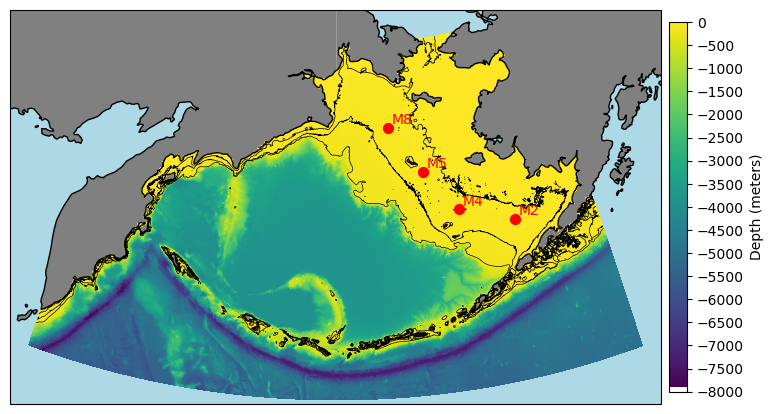

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.tri import Triangulation
from matplotlib.ticker import MaxNLocator

# Set up the plot with Cartopy using the Orthographic projection centered at 180° longitude, 60° latitude
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=180, central_latitude=60))

# Add land, ocean, and coastline features
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

# Transform triangulation points to the projection (correct unpacking)
transformed_points = ccrs.Orthographic(central_longitude=180, central_latitude=60).transform_points(ccrs.PlateCarree(), x, y)

# Extract the transformed x and y coordinates
x_proj = transformed_points[:, 0]
y_proj = transformed_points[:, 1]

# Plot the triangulation with the transformed coordinates and the average depth as facecolors
tp = ax.tripcolor(x_proj, y_proj, triangulation.triangles, facecolors=triangle_depths, shading='flat', cmap='viridis')

# Add colorbar with custom ticks every 500 meters
cbar = fig.colorbar(tp, ax=ax, shrink=0.6, pad=0.01)
cbar.set_label('Depth (meters)')

# Calculate the range of the depth and create ticks every 500 meters
min_depth = np.min(triangle_depths)
max_depth = np.max(triangle_depths)
tick_step = 500
colorbar_ticks = np.arange(min_depth - min_depth % tick_step, max_depth + tick_step, tick_step)
cbar.set_ticks(colorbar_ticks)

# Set the extent of the map to focus on the domain with added margins (e.g., 2 degrees buffer)
margin = 1  # Add a x-degree buffer to the extent
min_lon, max_lon = np.min(x), np.max(x)
min_lat, max_lat = np.min(y), np.max(y)
ax.set_extent([min_lon - margin/2, max_lon + margin/2, min_lat - margin*2, max_lat], crs=ccrs.PlateCarree())

# # Add title
# ax.set_title("Triangular Mesh with Coastline and Land Mask (Orthographic Projection)")

# Plot the locations
for i, coord in enumerate(data_coord):
    # Transform the location coordinates to the map's projection
    x_loc, y_loc = ccrs.Orthographic(central_longitude=180, central_latitude=60).transform_point(coord[0], coord[1], ccrs.PlateCarree())
    
    # Plot the point on the map
    ax.scatter(x_loc, y_loc, color='red', s=50, zorder=5)  # s is the size of the marker
    # Add the label next to the point
    #ax.text(x_loc + 20000, y_loc + 20000, f'{data_name[i]}({coord[0]:.1f}°, {coord[1]:.1f}°)', color='red', fontsize=10, zorder=6)
    ax.text(x_loc + 20000, y_loc + 20000, f'{data_name[i]}', color='red', fontsize=10, zorder=6)

contours = ax.tricontour(x_proj, y_proj, triangulation.triangles, depth, levels=[-200,-100,-50], colors="k", linewidths=.5,linestyles='solid')
# ax.clabel(contours, inline=True, fontsize=8, fmt='%.1f')

# Show the plot
# plt.tight_layout()
plt.show()